In [1]:
import pandas as pd

# Step 1: Load and convert
df = pd.read_csv(r"C:\Users\ppran\Downloads\chennai.csv", parse_dates=['month'])


print(df.dtypes)
print(df.head())


month                  datetime64[ns]
primary_price_avg             float64
secondary_price_avg           float64
retail_sales                  float64
non_retail_sales              float64
dtype: object
       month  primary_price_avg  secondary_price_avg  retail_sales  \
0 2022-04-01            73500.0            65634.615      12147.22   
1 2022-05-01            69360.0            61673.077       8720.57   
2 2022-06-01            61275.0            54661.538      10343.09   
3 2022-07-01            59625.0            58111.538       8034.57   
4 2022-08-01            58160.0            56779.167      11706.24   

   non_retail_sales  
0         64362.677  
1         58272.760  
2         48082.980  
3         33543.950  
4         28619.990  


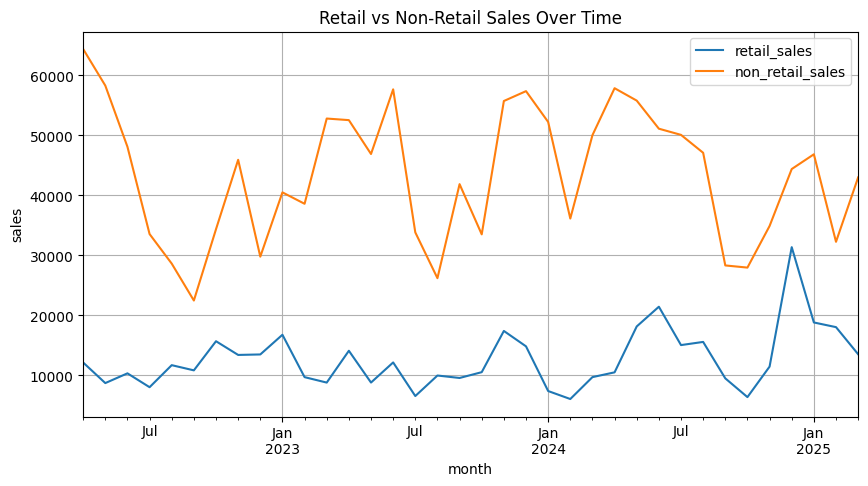

In [3]:
import matplotlib.pyplot as plt

df.plot(x='month', y=['retail_sales', 'non_retail_sales'], figsize=(10, 5))
plt.title('Retail vs Non-Retail Sales Over Time')
plt.xlabel('month')
plt.ylabel('sales')
plt.grid(True)
plt.show()


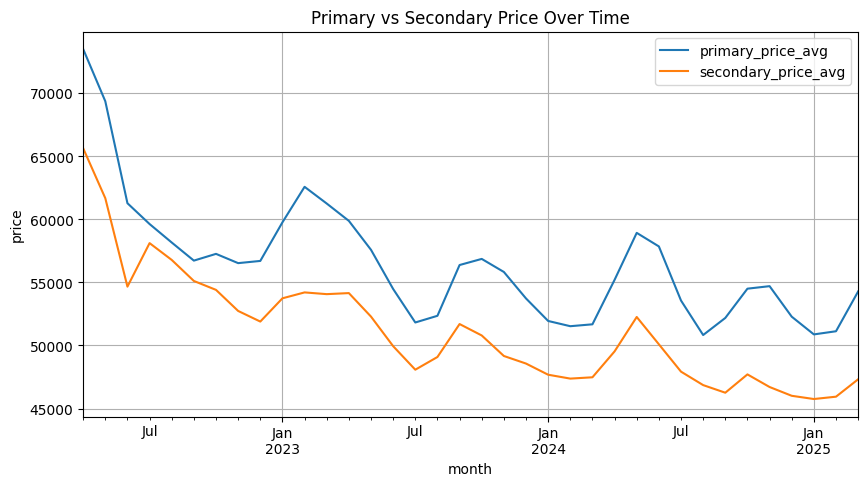

In [5]:
import matplotlib.pyplot as plt

df.plot(x='month', y=['primary_price_avg', 'secondary_price_avg'], figsize=(10, 5))
plt.title('Primary vs Secondary Price Over Time')
plt.xlabel('month')
plt.ylabel('price')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load your cleaned dataset
df = pd.read_csv(r"C:\Users\ppran\Downloads\chennai.csv", parse_dates=['month'])

# Step 1: Create price difference feature
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# Step 2: Select features and targets
features = ['primary_price_avg', 'secondary_price_avg', 'price_diff']
targets = ['retail_sales', 'non_retail_sales']

# Step 3: Evaluate each feature's effect using R² score
results = {}

for target in targets:
    results[target] = {}
    for feature in features:
        X = df[[feature]]
        y = df[target]

        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)

        results[target][feature] = r2

# Step 4: Display the R² scores
import pprint
print("📊 R² Scores (Higher = Stronger Influence):")
pprint.pprint(results)


📊 R² Scores (Higher = Stronger Influence):
{'non_retail_sales': {'price_diff': 0.20525635462077496,
                      'primary_price_avg': 0.1233516215431183,
                      'secondary_price_avg': 0.03938988889568851},
 'retail_sales': {'price_diff': 0.03426162349549944,
                  'primary_price_avg': 0.01807266490349646,
                  'secondary_price_avg': 0.04807959217169355}}


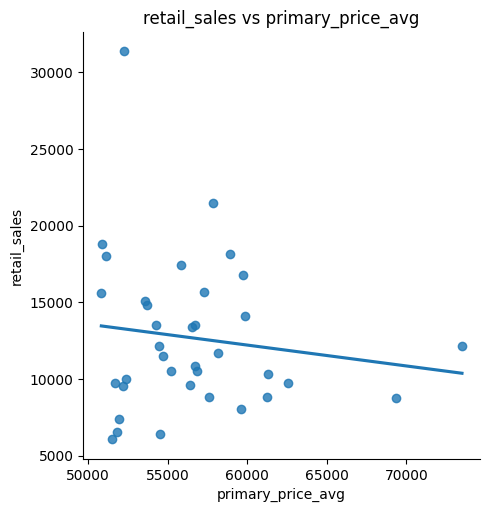

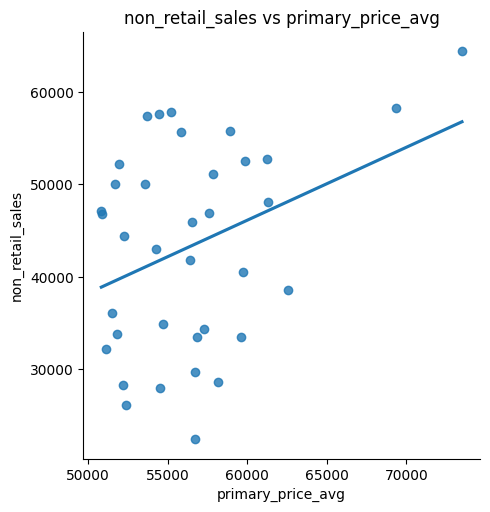

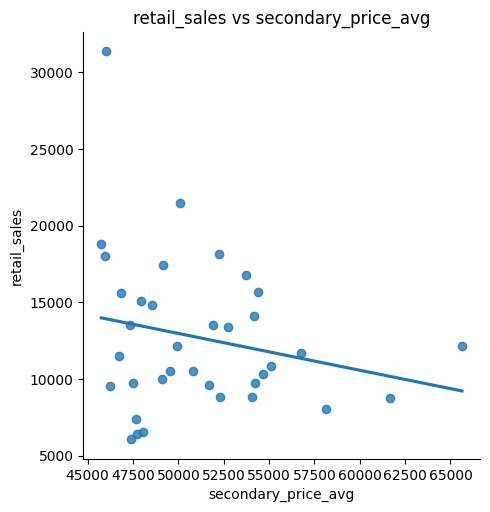

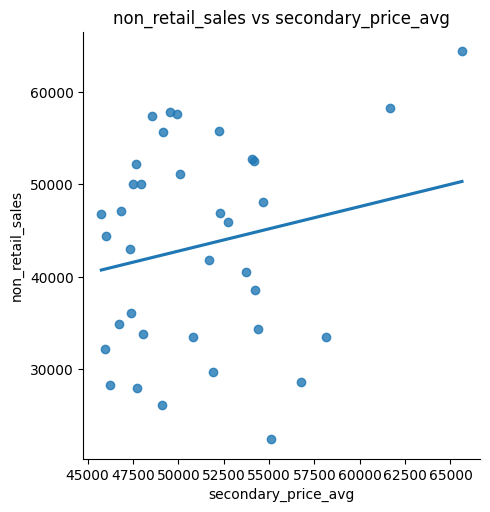

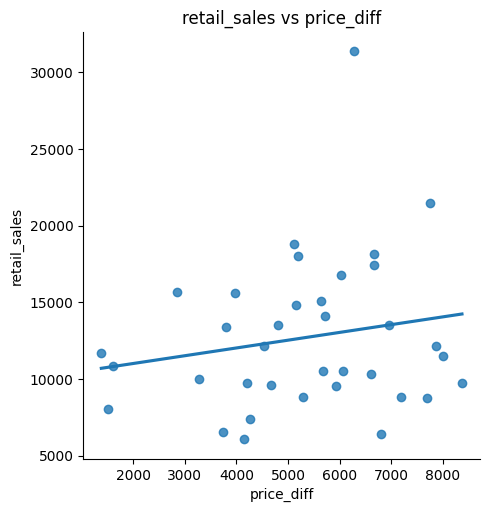

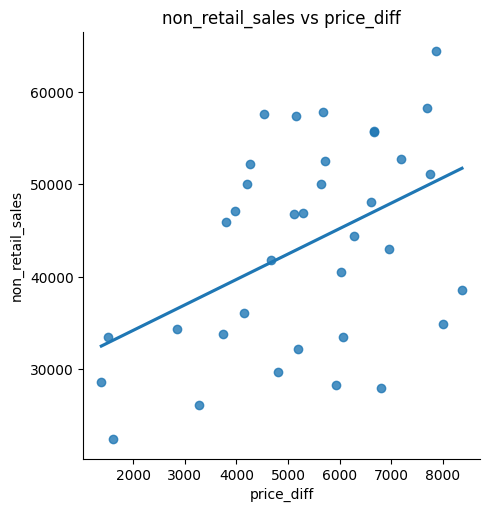

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    for target in targets:
        sns.lmplot(x=feature, y=target, data=df, ci=None)
        plt.title(f'{target} vs {feature}')
        plt.show()


In [2]:
import pandas as pd
import os

# === 1. Load your pre-sorted CSV ===
# 📍 CHANGE THIS PATH if your raw file is in a different folder or filename
df = pd.read_csv(r"C:\Users\ppran\Downloads\chennai.csv", parse_dates=['month'])

# === 2. Parse the 'date' column ===
# Format is assumed to be like 'Apr-22' or '2022-04-01'
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')  # your format is '2022-04-01'

# === 3. Create price difference feature ===
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

# === 4. Create lag features (1–3 months) for each variable ===
lag_features = ['retail_sales', 'non_retail_sales', 'primary_price_avg', 'secondary_price_avg', 'price_diff']

for feature in lag_features:
    for lag in range(1, 4):  # lag 1 to 3
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# === 5. Rolling 3-month average for price features ===
df['primary_price_roll3'] = df['primary_price_avg'].rolling(window=3).mean()
df['secondary_price_roll3'] = df['secondary_price_avg'].rolling(window=3).mean()

# === 6. Add calendar and time trend features ===
df['month'] = df['month'].dt.month             # 1 to 12
df['trend_index'] = range(len(df))            # 0, 1, 2, ...

# === 7. Drop rows without enough lag/rolling data (first 3 rows) ===
df = df.iloc[3:].reset_index(drop=True)

# === 8. Save to processed folder ===
# 📍 CHANGE THIS if you want to save elsewhere or rename file
processed_path = r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv"
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df.to_csv(processed_path, index=False)

print(f"✅ Processed CSV saved at: {processed_path}")


✅ Processed CSV saved at: C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv


In [4]:
import pandas as pd

# Load your processed CSV
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv")

df['date'] = pd.date_range(start='2022-07-01', periods=len(df), freq='MS')

# Optional: move 'date' column to the front if you want
cols = df.columns.tolist()
cols = ['date'] + [col for col in cols if col != 'date']
df = df[cols]

# Save if needed
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv", index=False)

print(df.head())


        date  month  primary_price_avg  secondary_price_avg  retail_sales  \
0 2022-07-01      7            59625.0            58111.538      8034.570   
1 2022-08-01      8            58160.0            56779.167     11706.240   
2 2022-09-01      9            56725.0            55111.538     10840.180   
3 2022-10-01     10            57260.0            54405.000     15692.454   
4 2022-11-01     11            56525.0            52734.615     13408.779   

   non_retail_sales  price_diff  retail_sales_lag_1  retail_sales_lag_2  \
0          33543.95    1513.462           10343.090             8720.57   
1          28619.99    1380.833            8034.570            10343.09   
2          22470.83    1613.462           11706.240             8034.57   
3          34352.95    2855.000           10840.180            11706.24   
4          45910.81    3790.385           15692.454            10840.18   

   retail_sales_lag_3  ...  primary_price_avg_lag_3  \
0            12147.22  ...     

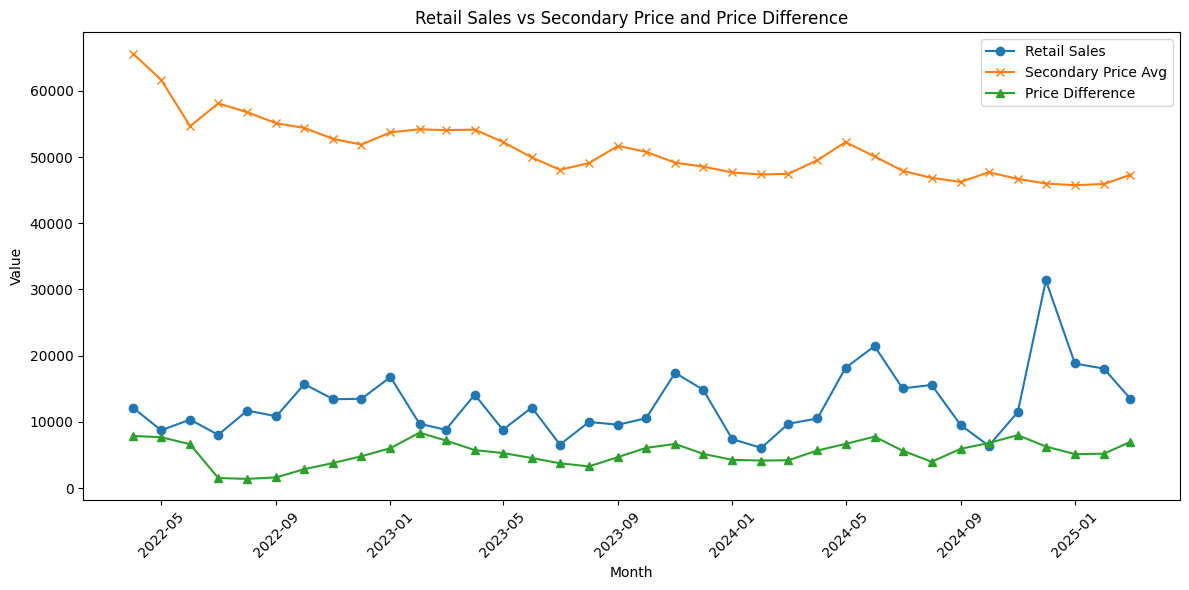

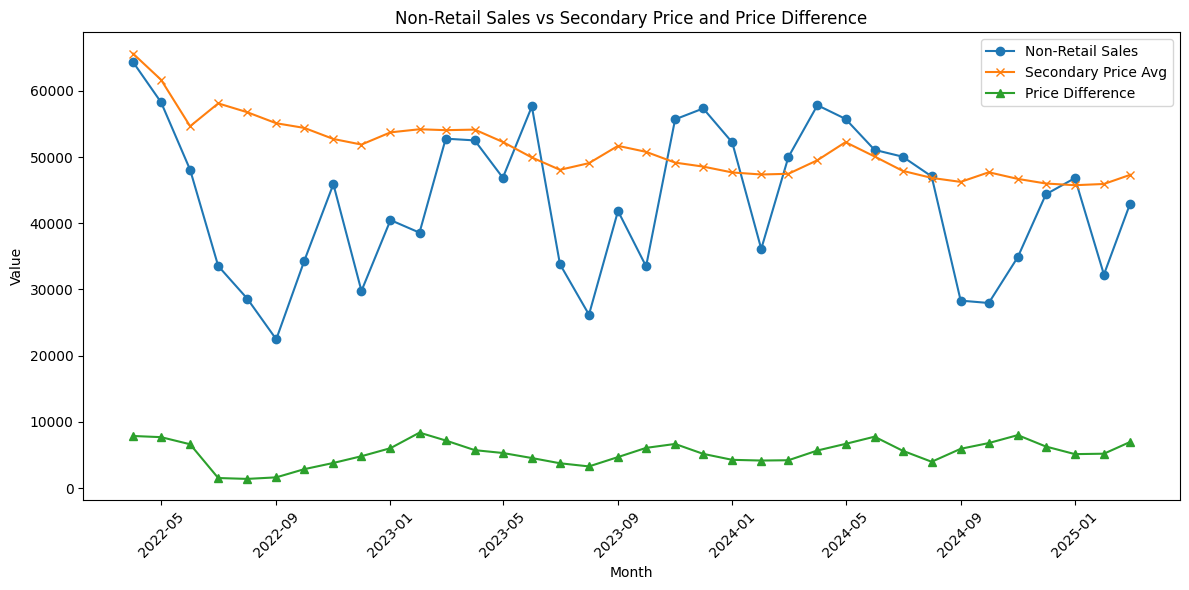

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\ppran\Downloads\chennai.csv", parse_dates=['month'])
df['price_diff'] = df['primary_price_avg'] - df['secondary_price_avg']

plt.figure(figsize=(12,6))
plt.plot(df['month'], df['retail_sales'], label='Retail Sales', marker='o')
plt.plot(df['month'], df['secondary_price_avg'], label='Secondary Price Avg', marker='x')
plt.plot(df['month'], df['price_diff'], label='Price Difference', marker='^')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Retail Sales vs Secondary Price and Price Difference')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(df['month'], df['non_retail_sales'], label='Non-Retail Sales', marker='o')
plt.plot(df['month'], df['secondary_price_avg'], label='Secondary Price Avg', marker='x')
plt.plot(df['month'], df['price_diff'], label='Price Difference', marker='^')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Non-Retail Sales vs Secondary Price and Price Difference')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# 1. Read CSV with date parsing
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv", parse_dates=['date'], dayfirst=True)  # dayfirst=True for dd-mm-yyyy

# 2. Sort by date
df = df.sort_values('date')

# 3. Add rolling averages for retail and non-retail sales
df['retail_sales_roll3'] = df['retail_sales'].rolling(window=3, min_periods=1).mean()
df['non_retail_sales_roll3'] = df['non_retail_sales'].rolling(window=3, min_periods=1).mean()

# 4. Save updated DataFrame to CSV (overwrite or new file)
df.to_csv(r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv", index=False)


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 1. Read CSV with date parsing
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv", parse_dates=['date'], dayfirst=True)

# 2. Drop columns you don't want as features
df = df.drop(columns=['month', 'trend_index', 'date'])

# 3. Define targets and initialize dictionary to store results
targets = ['retail_sales', 'non_retail_sales']
feature_importances_results = {}

for target in targets:
    # Prepare features and target
    X = df.drop(columns=[target])
    y = df[target]
    
    # Train RandomForestRegressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Extract and sort feature importances
    feature_importances = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    feature_importances_results[target] = feature_importances
    
    print(f"\nTop features for target: {target}\n", feature_importances.head(5))

# If you want, you can access feature_importances_results['retail_sales'] or ['non_retail_sales'] for further use.



Top features for target: retail_sales
                       feature  importance
22         retail_sales_roll3    0.327159
6          retail_sales_lag_2    0.087933
16  secondary_price_avg_lag_3    0.087562
17           price_diff_lag_1    0.064900
9      non_retail_sales_lag_2    0.058119

Top features for target: non_retail_sales
                         feature  importance
24  non_retail_sales_custom_avg    0.457559
23       non_retail_sales_roll3    0.220576
3                  retail_sales    0.031968
7            retail_sales_lag_3    0.030810
2                     stock_var    0.027491


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
df = pd.read_csv(r"C:\Users\ppran\Downloads\notebook\processed\chennai_pr.csv", parse_dates=['date'], dayfirst=True)
df = df.drop(columns=['month', 'trend_index', 'date'])

# Feature sets for each target
features_retail = ['retail_sales_roll3', 'retail_sales_lag_2', 'secondary_price_avg_lag_3', 'stock_var', 'price_diff_lag_1']
features_non_retail = ['non_retail_sales_roll3', 'retail_sales', 'stock_var', 'non_retail_sales_custom_avg', 'non_retail_sales_lag_3']

# Targets
target_retail = 'retail_sales'
target_non_retail = 'non_retail_sales'

# Prepare data
X_retail = df[features_retail]
y_retail = df[target_retail]

X_non_retail = df[features_non_retail]
y_non_retail = df[target_non_retail]

# Train-test split function for reuse
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Models dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR()
}

# Evaluation function
def evaluate_models(X, y):
    X_train, X_test, y_train, y_test = split_data(X, y)
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        results[name] = {
            'MAE': mean_absolute_error(y_test, preds),
            'RMSE': np.sqrt(mean_squared_error(y_test, preds)),

            'R2': r2_score(y_test, preds)
        }
    return results

# Evaluate retail models
print("Evaluating models for retail sales:")
results_retail = evaluate_models(X_retail, y_retail)
for model_name, metrics in results_retail.items():
    print(f"{model_name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")

print("\nEvaluating models for non-retail sales:")
# Evaluate non-retail models
results_non_retail = evaluate_models(X_non_retail, y_non_retail)
for model_name, metrics in results_non_retail.items():
    print(f"{model_name}: MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}, R2={metrics['R2']:.3f}")


Evaluating models for retail sales:
Linear Regression: MAE=1802.791, RMSE=2552.128, R2=0.553
Random Forest: MAE=2736.331, RMSE=3546.470, R2=0.138
Gradient Boosting: MAE=2896.402, RMSE=3710.962, R2=0.056
SVR: MAE=3428.460, RMSE=3826.060, R2=-0.004

Evaluating models for non-retail sales:
Linear Regression: MAE=6917.279, RMSE=7652.118, R2=0.519
Random Forest: MAE=6668.320, RMSE=8099.241, R2=0.461
Gradient Boosting: MAE=6873.281, RMSE=8917.377, R2=0.346
SVR: MAE=10875.908, RMSE=11180.333, R2=-0.028
